Name: Abhishek Malik

Andrew ID: aamalik

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
import spacy 
import glob

#Disabling named entity recognization for efficinecy.
nlp = spacy.load('en', disable = ['ner', 'parser', 'tagger']) 

lst = glob.glob('./HW1_Dataset/*.txt')
all_corpus = ''

#Building the corpus for nlp.
for x in lst:
    with open(x,encoding='utf-8') as f:
        corpus = f.read().replace('\n',' ')
        all_corpus += corpus

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [2]:
from collections import Counter 
import re
import pandas as pd
import numpy as np

#Counter to store frequency of each word.
count = Counter()

#Increasing maximum length of characters spacy can process at a given time.
nlp.max_length = 5000000000

parsed_text = nlp(all_corpus)

#Ensuring only tokens that consist of alphabetic letters are included.
for token in parsed_text:
    if re.match('[a-zA-Z]+$', str(token)):
        count[token.lemma_] +=1

transfer = count.most_common(50)

#Dataframe containing the 50 most frequent words.
df = pd.DataFrame(transfer)
df.columns = ['Word', 'Frequency']
df['Rank'] = df.index+1

#Dataframe containing frequency of all words.
df2 = pd.DataFrame.from_dict(count, orient='index').reset_index()
df2.columns = ['Word', 'Frequency']
df2 = df2.sort_values(by=['Frequency'], ascending=False).reset_index()
df2.index.name = 'Rank'
df2 = df2.drop(['index'], axis=1)
df2.head(50)

,Word,Frequency
Rank,,
0,the,648221
1,be,423569
2,and,394399
3,of,378295
4,a,337297
5,to,314597
6,in,192739
7,I,188246
8,that,161248


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

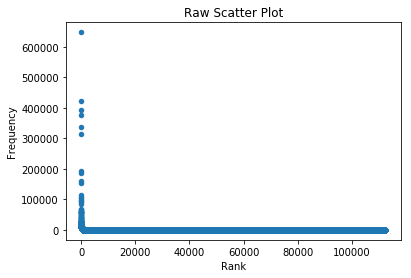

In [8]:
# Raw scatter plot
df2.reset_index().plot.scatter(x = df2.index.name, y= 'Frequency', title='Raw Scatter Plot')

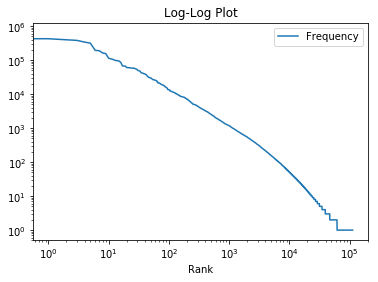

In [4]:
### Log-log plot
df2.reset_index().plot(x='Rank', y='Frequency', loglog=True, title='Log-Log Plot')

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 

***The log-log plot above is consistent with the power law's conclusion about the relationship between term frequency and rank. We observe a downward facing slope that proves empirically that frequency and rank are inversely proportional.***

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [5]:
print('Probability of drawing one of the 4 most frequent words: ')

#Fetching into first variable the top 4 from the Counter object count
#and dividing it by the total frequency count.
first = count.most_common(4)
numerator = sum(pair[1] for pair in first)
denominator = sum(v for v in count.values())
print (round((numerator / denominator),2))

print('Probability of drawing one of the 50 most frequent words: ')

#Fetching into first variable the top 50 from the Counter object count
#and dividing it by the total frequency count.
second = count.most_common(50)
numerator = sum(pair[1] for pair in second)
denominator = sum(v for v in count.values())
print (round((numerator / denominator),2))

Probability of drawing one of the 4 most frequent words: 
0.15
Probability of drawing one of the 50 most frequent words: 
0.45


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [6]:
print("Occur only once: ")

#Dividing the length of df2 where the Frequency is 1 by
#the lenght of the Counter object.
print (round((len(df2.loc[df2['Frequency'] == 1]) / len(count.keys())),2))

print("Occur fewer than 10 times: ")

#Dividing the length of df2 where the Frequency is less than 10 by
#the lenght of the Counter object.
print (round((len(df2.loc[df2['Frequency'] < 10]) / len(count.keys())),2))

Occur only once: 
0.45
Occur fewer than 10 times: 
0.79


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

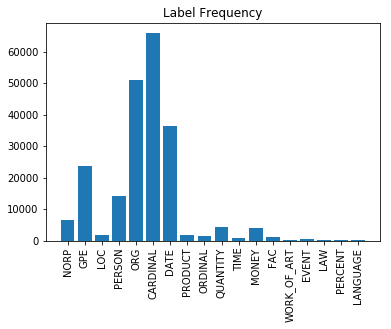

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy

nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

#Iterating through the entities in each member of the list reuters_nlp
#and placing them in the label counter with their frequencies.
for x in reuters_nlp:
    for ent in x.ents:
        label_counter[f'{ent.label_}'] += 1

x,y = label_counter.keys(), label_counter.values()

#Plotting the bar chart with entity labels on x-axis
#and frequency on y.
plt.title('Label Frequency')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.rcParams.update(plt.rcParamsDefault)

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [10]:
from collections import defaultdict
org_dict = defaultdict(int)

#Iterating through the entities to identify [ORG] how many times
#it occurs per article.
for x in reuters_nlp:
    seen = set([])
    for ent in x.ents:
        if ent.label_ == 'ORG' and not ent.orth_ in seen:
            org_dict[ent.orth_] += 1
            seen.add(ent.orth_)
org_dict = [(ent, count) for ent, count in org_dict.items()]
org_dict = sorted(org_dict, key=lambda kv: kv[1])

#DataFrame for top 10 ORG labels.
df_ORG = pd.DataFrame(org_dict)
df_ORG.columns = ['ORG', 'Frequency']
df_ORG = df_ORG.sort_values(by = 'Frequency', ascending = False)
df_ORG.index = [i for i in range(len(df_ORG))]
df_ORG.index.name = 'Rank'
df_ORG.head(10)

,ORG,Frequency
Rank,,
0,Avg,583
1,Reuters,445
2,the Securities and Exchange Commission,244
3,EC,240
4,USDA,226
5,NET,203
6,Treasury,157
7,FED,141
8,Congress,138


In [11]:
from collections import defaultdict
gpe_dict = defaultdict(int)

#Iterating through the entities to identify [GPE] how many times
#it occurs per article.
for x in reuters_nlp:
    seen = set([])
    for ent in x.ents:
        if ent.label_ == 'GPE' and not ent.orth_ in seen:
            gpe_dict[ent.orth_] += 1
            seen.add(ent.orth_)
gpe_dict = [(ent, count) for ent, count in gpe_dict.items()]
gpe_dict = sorted(gpe_dict, key=lambda kv: kv[1])

#DataFrame for top 10 ORG labels.
df_GPE = pd.DataFrame(gpe_dict)
df_GPE.columns = ['GPE', 'Frequency']
df_GPE = df_GPE.sort_values(by = 'Frequency', ascending = False)
df_GPE.index = [i for i in range(len(df_GPE))]
df_GPE.index.name = 'Rank'
df_GPE.head(10)

,GPE,Frequency
Rank,,
0,U.S.,1666
1,Shr,690
2,Japan,536
3,the United States,345
4,U.K.,309
5,Canada,243
6,New York,239
7,West Germany,232
8,Washington,230


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [12]:
import math

count_of_opec = 0
temp_list1 = []

#Storing all articles in reuters_nlp with OPEC into a temporary list
#the objective of doing this is to limit the number of documents to be 
#processed that contain both OPEC and GPEs.
for x in reuters_nlp:
    temp = [y.orth_ for y in x.ents]
    if 'OPEC' in temp:
        count_of_opec += 1
        temp_list1.append(x)

#Probability of OPEC [P(B)]
prob_of_opec = count_of_opec / len(reuters_nlp)

summation = df_GPE['Frequency'].sum()

#P(A)
df_GPE['Frequency'] = df_GPE['Frequency'].div(summation)
                
list_of_GPEs = df_GPE['GPE'].tolist()


#Constructing a dictionary where the count of each GPE is incremented
#on being found in our limited document set.
gpe_dict = defaultdict(int)

for x in temp_list1:
    seen = set([])
    for ent in x.ents:
        if ent.label_ == 'GPE' and not ent.orth_ in seen:
            gpe_dict[ent.orth_] += 1
            seen.add(ent.orth_.replace("'",""))
gpe_dict = [(ent, count) for ent, count in gpe_dict.items()]
gpe_dict = sorted(gpe_dict, key=lambda kv: kv[1])

denominator = len(reuters_nlp)
    
prob_of_a_comma_b = {}

gpe_dict = dict(gpe_dict)

#Calculating P(A,B).
for k,v in gpe_dict.items():
    gpe_dict[k] = v / denominator

ans = {}

#Calculating PMI using previously constructed DataFrame
#and probability information.
for x in gpe_dict.keys():
    for y in list_of_GPEs:
        if x == y:
            #print (x,y)
            ans[x] = math.log(gpe_dict[x] / (prob_of_opec * df_GPE.loc[df_GPE['GPE'] == x, 'Frequency'].iloc[0]))
            
ans = pd.DataFrame.from_dict(ans, orient = 'index').reset_index()
ans.columns = ['GPE', 'OPEC']
temp = ans['GPE'].tolist()
temp2 = []

#Constructing a list of those GPEs that have P(A,B) = 0
#and this list is used to make a new DatFrame that is appended
#to the final answer.
#for x in list_of_GPEs:
#    if x not in temp:
#        temp2.append(x)
#add_this = pd.DataFrame({'GPE' : temp2, 'OPEC' : 0})
#ans = ans.append(add_this).reset_index().drop('index', axis=1)
ans = ans.sort_values(by='OPEC', ascending = False).reset_index().drop('index', axis = 1)
ans.head(50)

,GPE,OPEC
0,Saudi Arabia's,4.955952
1,Visnews,4.895328
2,DISCUSSION,4.895328
3,Emirates,4.895328
4,Lichtblau,4.895328
5,Gabon on Africa's,4.895328
6,Easter,4.895328
7,PGRT,4.895328
8,CERA,4.895328
9,Neutral Zone,4.895328


#### If we compare the GPEs that appear in the co-occurences of GPEs with OPEC without using the PMI formula and the GPEs after using PMIs we see a difference in the list. Thus it can be concluded that simple occurence was painting a specious picture when it came to association between entities. Thus by using PMI we were able to weigh the entities to find out the true correlations.

#### It is also worth observing that spacy is not a perfect package, many entities in the PMI list are not actual GPEs, take for example VISNEWS. It is a London based international news agency however it has been identified as a GPE entity. Also there are cases where an entity has co-occured exactly as many times as it is present which also pushes up its PMI value.

#### Both these observations provide an interesting look at the capabilities and reliaiblity of the spacy package.

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3